In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import statsmodels.api as sm
from scipy.stats import f_oneway

In [15]:
df1 = pd.read_csv(r'C:\Aditya Lenovo\Data Science\Dataset\hospitalization_data.csv')

In [16]:
df1.head(10)

,age,sex,smoker,region,viral_load,severity_level,hospitalization_charges
0,56,male,no,northwest,7214,4,18004.08
1,46,male,yes,northeast,7070,1,16622.16
2,32,male,no,southwest,4061,4,15479.28
3,60,male,no,northeast,5593,5,16766.87
4,25,male,yes,northeast,5741,4,18716.03
5,38,female,yes,northwest,5391,2,15126.07
6,56,male,no,southeast,4174,4,12737.47
7,36,male,no,northeast,3992,3,13330.50
8,40,male,yes,southeast,4961,4,18916.93
9,28,female,yes,southwest,6759,2,16705.84


Variables for predicting the reason for hospitalization are - age, smoker, viral_load,serverity_level

In [17]:
# Group charges by region
northeast = df1[df1['region'] == 'northeast']['hospitalization_charges']
northwest = df1[df1['region'] == 'northwest']['hospitalization_charges']
southeast = df1[df1['region'] == 'southeast']['hospitalization_charges']
southwest = df1[df1['region'] == 'southwest']['hospitalization_charges']

# Run ANOVA test
f_stat, p_val = f_oneway(northeast, northwest, southeast, southwest)

print(f"F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")

F-statistic: 0.886, p-value: 0.448


An ANOVA test was performed to compare hospitalization charges across different regions. The result was not statistically significant (F = 0.886, p = 0.448), indicating that regional location does not appear to have a significant impact on hospitalization charges.

We wanted to find the relationship between the variables "age" and "hospitalization_charges". When the data was visualized using Seaborn and Matplotlib libraries, the plot was very difficult to interpret. Hence, we went with the Statistical way to determine the relationship. 

In [18]:
corr, p_value = pearsonr(df1['age'], df1['hospitalization_charges'])
print(f"Pearson Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Pearson Correlation: 0.038, p-value: 0.401


After using the Pearson Correlation Coefficient Test, we found that the Pearson correlation is 0.038, which is very close to 0, indicating almost no linear relationship between "age" and "hospitalization_charges".
Furthermore, the p-value is 0.4, which means there is a 40% chance that this weak correlation could have occurred randomly, even if there were no actual relationship between the two variables.
Since the p-value is much higher than the commonly used threshold of 0.05, we do not have enough statistical evidence to reject the null hypothesis.
As a result, we can confidently conclude that there is no significant relationship between "age" and "hospitalization_charges".

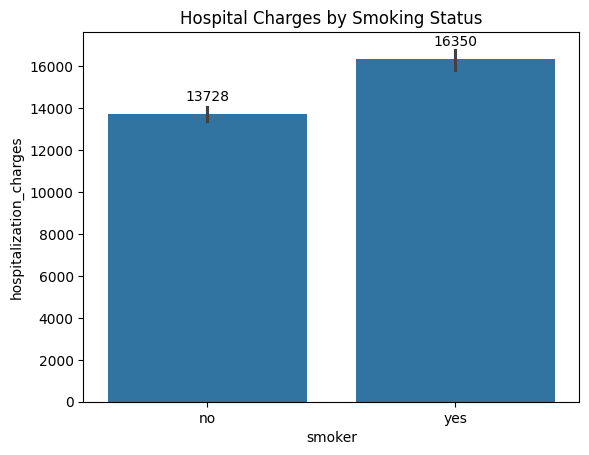

In [19]:
ax = sns.barplot(x='smoker', y='hospitalization_charges', data=df1)
plt.title("Hospital Charges by Smoking Status")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=7)

plt.show()

The barplot comparing hospitalization charges by smoking status shows that smokers have higher average hospitalization charges than non-smokers.
This visual trend suggests a positive association between smoking and increased hospitalization_charges.

In [20]:
group1 = df1[df1['smoker'] == 'yes']['hospitalization_charges']
group2 = df1[df1['smoker'] == 'no']['hospitalization_charges']
print(f"Smokers: {len(group1)}, Non-smokers: {len(group2)}")

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

Smokers: 165, Non-smokers: 335
T-statistic: 8.860, p-value: 0.000


Based on the independent samples t-test, the mean hospitalization charges for smokers (n = 165) and non-smokers (n = 335) were compared.
The test yielded a t-statistic of 8.860 and a p-value of 0.000, indicating that the difference in hospitalization charges between the two groups is statistically significant (p < 0.05).
Therefore, we conclude that smokers incur significantly higher hospitalization charges compared to non-smokers.

In [21]:
corr, p_value = pearsonr(df1['viral_load'], df1['hospitalization_charges'])
print(f"Pearson Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Pearson Correlation: 0.186, p-value: 0.000


The Pearson correlation coefficient between viral load and hospitalization charges is 0.186, with a p-value of 0.000.
This indicates a very weak positive linear relationship between viral load and hospitalization charges.
However, since the p-value is less than 0.05, the correlation is statistically significant, suggesting that as viral load increases, hospitalization charges tend to increase slightly.

In [22]:
corr, p_value = pearsonr(df1['severity_level'], df1['hospitalization_charges'])
print(f"Pearson Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Pearson Correlation: 0.819, p-value: 0.000


The Pearson correlation coefficient between severity level and hospitalization charges is 0.819, with a p-value of 0.000.
This indicates a strong positive linear relationship between the two variables.
Since the p-value is less than 0.05, the correlation is statistically significant, meaning that as severity level increases, hospitalization charges tend to increase significantly.

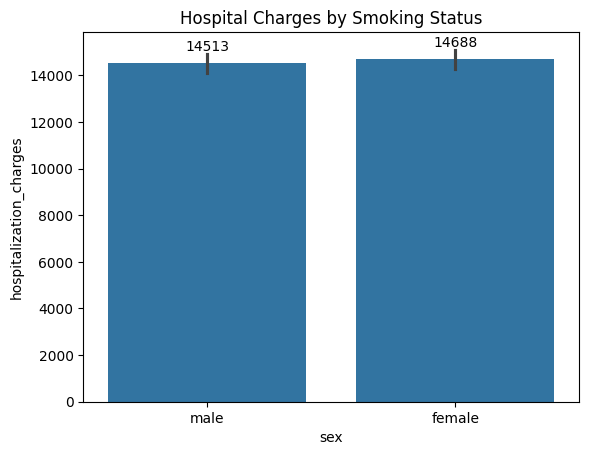

In [23]:
ax = sns.barplot(x='sex', y='hospitalization_charges', data=df1)
plt.title("Hospital Charges by Smoking Status")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=7)

plt.show()

In [24]:
group1 = df1[df1['sex'] == 'male']['hospitalization_charges']
group2 = df1[df1['sex'] == 'female']['hospitalization_charges']
print(f"Male: {len(group1)}, Female: {len(group2)}")

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")

Male: 271, Female: 229
T-statistic: -0.583, p-value: 0.560


An independent t-test was conducted to compare hospitalization charges between male and female patients. The results showed no statistically significant difference between the two groups (t = -0.583, p = 0.560). Thus, gender does not appear to be a key factor influencing hospitalization charges.

C:\Users\LOQ\AppData\Local\Temp\ipykernel_23648\2584635672.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=influence_df, x='Variable', y='Influence', palette='coolwarm')


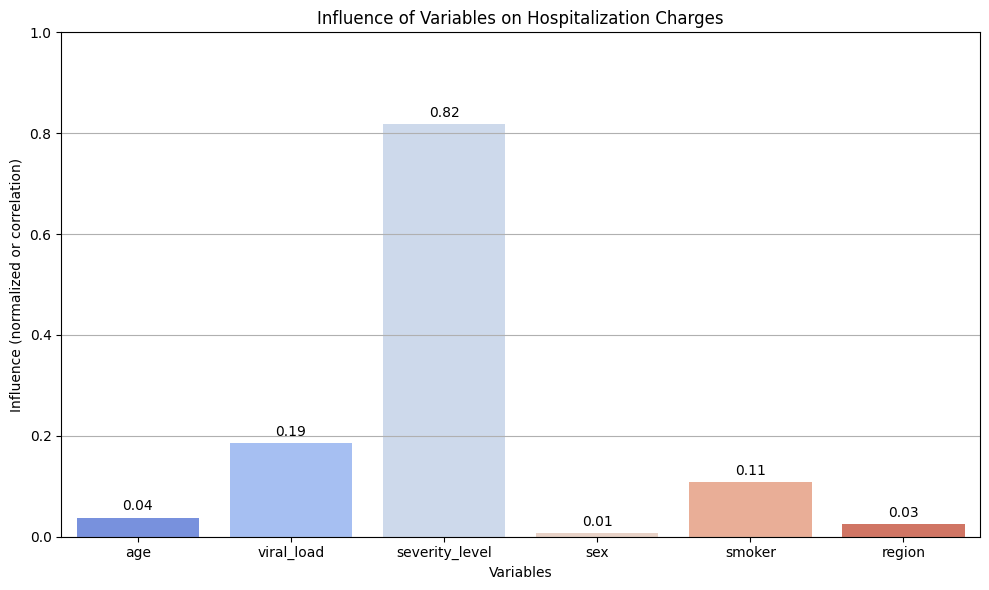

In [ ]:
influences = {}

# Numeric variables — use absolute Pearson correlation
numeric_vars = ['age', 'viral_load', 'severity_level']
for var in numeric_vars:
    corr, _ = pearsonr(df1[var], df1['hospitalization_charges'])
    influences[var] = abs(corr)  # absolute correlation

# Categorical variables — use normalized range of group means
categorical_vars = ['sex', 'smoker', 'region']
for var in categorical_vars:
    group_means = df1.groupby(var)['hospitalization_charges'].mean()
    influence = group_means.max() - group_means.min()
    influences[var] = influence / df1['hospitalization_charges'].max()  # normalize

influence_df = pd.DataFrame(list(influences.items()), columns=['Variable', 'Influence'])

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=influence_df, x='Variable', y='Influence', palette='coolwarm')
plt.title('Influence of Variables on Hospitalization Charges')
plt.ylabel('Influence (normalized or correlation)')
plt.xlabel('Variables')
plt.ylim(0, 1)
plt.grid(axis='y')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

From the above bargraph it is evident that "severity_level" was the reason people were being hospitalized, followed by "viral_load" and "smoker".